# Sampling Simulation
In class, we covered the central limit theorem and the law of large numbers. This exercise will demonstrate these concepts using a sample of coin flips from a fair coin. Next, we will simulate sampling from the diamonds dataset to illustrate how sample means converge to the population mean as sample size increases.

Note that what we will cover here follows closely with the 'hacker stats' module and introduction to statistics in DataCamp.

## General housekeeping items
Let’s begin by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Simulate and plot data on coin flips
Imagine that 1,000 students on campus are each given a fair coin. Each student is asked to flip the coin 10 times and record the number of heads and tails (0=tails and 1=heads). In expectation, half of the flips should be tails and half of the flips should be heads. Coin flips can be thought of as following a 'random walk' where each flip is independent of the previous flips. In other words, the outcome of one flip does not affect the outcome of the next flip. This means that each flip has a 50% chance of being heads and a 50% chance of being tails, regardless of the outcomes of previous flips (if you have ever thought that a coin is "due" for heads or tails, you are falling victim to the gambler's fallacy!).

We are going to simulate a scenario where many people flip a coin several times. Let’s store the number of coin flips per person in n_tries and the number of people flipping coins in n_samples.

In [2]:
n_tries = 10
n_samples = 1000

Next, we will build a simulation using a “for loop” where each person in n_samples flips a coin n_tries times. Each flip represents a random draw from values 0 or 1 (where 0 represents tails and 1 represents heads). The results of each sample are stored in a list called final_heads.

In [3]:
np.random.seed(42) # Set a random seed for reproducibility

final_heads = [] # Initialize an empty list to store the number of heads for each sample

for _ in range(n_samples): # Loop through each sample
    heads = [0] # Start with zero heads for each sample
    for _ in range(n_tries): # Loop through each flip
        coin = np.random.randint(0, 2) # Randomly select a coin flip outcome (0 or 1)
        heads.append(heads[-1] + coin) # Add the result of the flip to the heads list
    final_heads.append(heads[-1]) # Append the total number of heads for this sample to final_heads

final_heads = pd.DataFrame(final_heads, columns=['heads']) # Convert final_heads to a DataFrame for easier handling

final_heads = final_heads.groupby('heads').size().reset_index(name='count') # Aggregate the data so that we have the count of heads for each sample

print(final_heads)

    heads  count
0       0      1
1       1      4
2       2     50
3       3    121
4       4    203
5       5    256
6       6    198
7       7    114
8       8     37
9       9     14
10     10      2


Inspect the output from the loop above. For each possible number of heads (from 0 to n_tries), we have a count of how many samples had that number of heads. Next, let's plot the distribution of the number of heads using a bar plot.

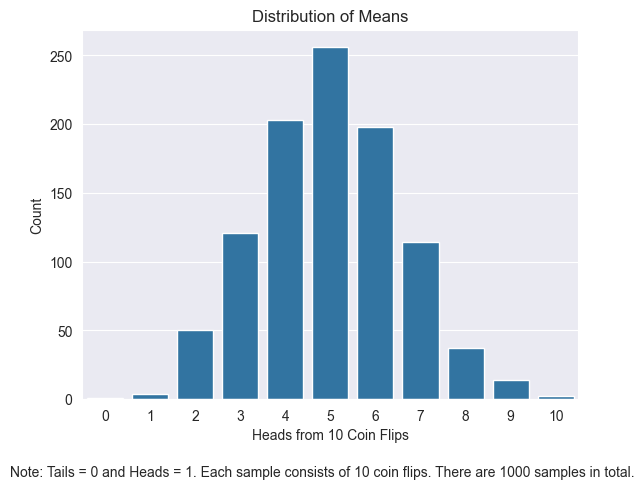

In [4]:
sns.barplot(x='heads', y='count', data=final_heads)
plt.xlabel(f'Heads from {n_tries} Coin Flips')
plt.ylabel('Count')
plt.title('Distribution of Means')
plt.figtext(0.5, -0.05,
            f"Note: Tails = 0 and Heads = 1. Each sample consists of {n_tries} coin flips. There are {n_samples} samples in total.",
            wrap=True, horizontalalignment='center', fontsize=10)
plt.show()


Notice that the most common averages fall around 5, but many (most!) are not exactly 5. In fact, some coin flippers had averages far away from 5 (e.g., 2 tails and 8 heads in 10 flips). However, as we get farther away from the “expected mean” of 5, the instances become more rare… more precisely, the distribution of sample averages follows a normal distribution. This is the central limit theorem at work!

### Exercise 1
Explore the law of large numbers by changing the value of n_tries and rerun the simulation. What happens to the distribution (pay particular attention to the values on the x-axis)? Why?

Change the values in n_samples and rerun the simulation. What happens to the distribution? Why?

### Exercise 2
Imagine that you were one of the coin flippers who flipped 9 heads and 1 tail. Suppose this is all the information that you were allowed to collect on your coin. What might you conclude about the “fairness” of your coin?

### Exercise 3
Use the AI assistant of your choice to write Python code that simulates 100 individuals, each rolling two six-sided dice 10 times. For each roll, record the sum of the two dice, then compute each individual’s average across their 10 rolls. Plot the distribution of these 100 averages using a histogram. Make sure to write the code such that changing the numer of individuals and rolls is simple. Next, repeat the simulation with 100 rolls per individual instead of 10—what changes do you observe in the histogram? Then increase the number of individuals to 1,000—how does the distribution change? Why?

## Simulate sampling from the diamonds dataset

The example above may seem a little abstract. Let’s see explore these principles in action using the diamonds dataset. Here, let’s imagine that 1,000 auditors each take an independent sample from the diamonds dataset. Each auditor takes a sample of 30 diamonds and is asked to determine the average carat weight.

As above, let’s store our number of samples, sample size, and other information in objects (so that we can make easy changes later).

In [5]:
n_samples = 1000
sample_size = 30
sample_variable = "carat"

Next, let’s take a look at summary statistics and the distribution of carat weight.

In [6]:
diamonds = sns.load_dataset('diamonds') # Load diamonds dataset directly from seaborn - This is the original source of the data
# diamonds = pd.read_pickle('diamonds.pkl') # Import the diamonds dataset from a pickle file - preferred method from local file

# Print summary statistics for the 'carat' variable
print(diamonds[[sample_variable]].describe())

              carat
count  53940.000000
mean       0.797940
std        0.474011
min        0.200000
25%        0.400000
50%        0.700000
75%        1.040000
max        5.010000


Next, let's visualize this distribution with a histogram.

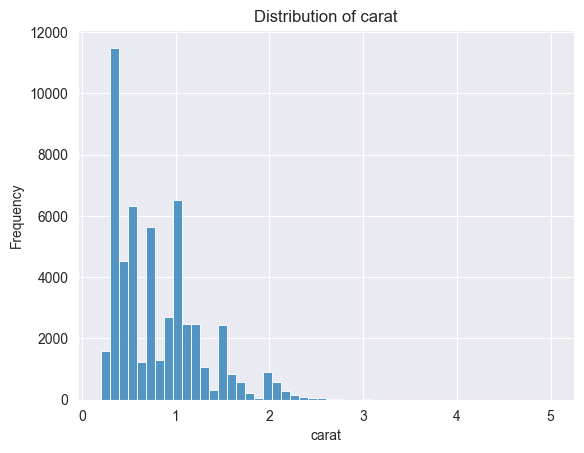

In [7]:
# Plot the distribution of carat weights
sns.histplot(data=diamonds, x=sample_variable, bins=50)
plt.title(f"Distribution of {sample_variable}")
plt.xlabel(sample_variable)
plt.ylabel("Frequency")
plt.show()

Notice that the distribution of carat weight is positively skewed and has several breakpoints.

Let’s take our own sample of the diamonds dataset.

In [8]:
example_sample = diamonds.sample(n=30, replace=False, random_state=42)

# Display summary statistics of the sample
print(example_sample[[sample_variable]].describe())

           carat
count  30.000000
mean    0.799333
std     0.550661
min     0.230000
25%     0.400000
50%     0.555000
75%     1.030000
max     2.070000


Take a look at your sample above. Change the options in sample() and see what changes.

Following the coin flips example, let’s simulate taking independent samples, determining the sample average, and plotting the results.

In [9]:
np.random.seed(42)

samples_list = []

for s in range(n_samples):
    sample_df = diamonds.sample(n=sample_size, replace=False)[[sample_variable]].copy() # Take a sample of diamonds
    sample_df['sample'] = s # Add a sample identifier
    samples_list.append(sample_df) # Append the sample DataFrame to the list

diamonds_samples = pd.concat(samples_list, ignore_index=True) # Combine all samples into a single DataFrame

diamond_averages = diamonds_samples.groupby('sample').agg(
    average_value=(sample_variable, 'mean')
).reset_index() # Calculate the average value for each sample

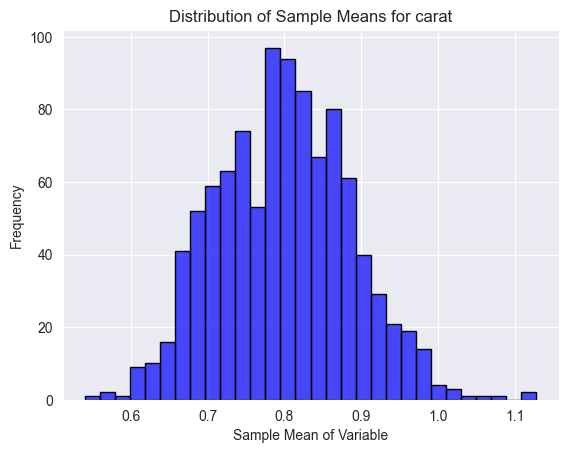

In [10]:
sns.histplot(diamond_averages['average_value'], bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title(f"Distribution of Sample Means for {sample_variable}")
plt.xlabel("Sample Mean of Variable")
plt.ylabel("Frequency")
plt.show()

### Exercise 4
What do you notice about the difference between the distribution of carat weight in the entire population versus the distribution of the averages from the samples? What forces are at work here?

Tinker with the inputs to the simulation (e.g., n_samples, sample_size, and sample_variable). What happens to the distributions? Why?